In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
df = pd.read_csv('2023_subway_censusvar.csv')

In [5]:
%%R -o df

df <- read_csv('2023_subway_censusvar.csv')

Rows: 6936 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Month, borough, Equipment Type, Equipment Code, Station Name, Stat...
dbl (34): GEOID, total_outages, Scheduled Outages, Unscheduled Outages, Entr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = availability ~ sub_pop_estimate, data = df)

Residuals:


     Min       1Q   Median       3Q      Max 
-0.96368  0.01701  0.03250  0.04003  0.05285 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.471e-01  2.483e-03 381.390  < 2e-16 ***
sub_pop_estimate 6.062e-06  1.927e-06   3.146  0.00166 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1258 on 6849 degrees of freedom
  (85 observations deleted due to missingness)
Multiple R-squared:  0.001443,	Adjusted R-squared:  0.001298 
F-statistic:   9.9 on 1 and 6849 DF,  p-value: 0.00166

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 85 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 85 rows containing missing values (`geom_point()`). 



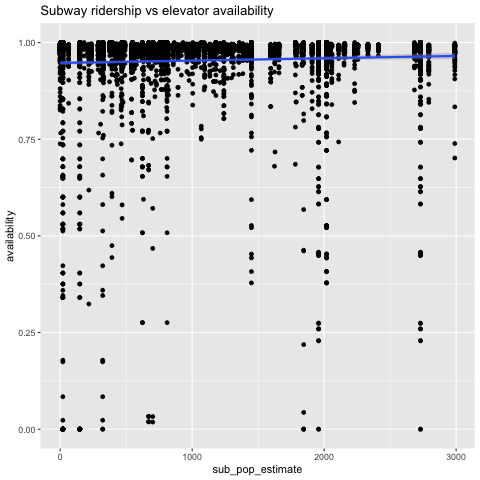

In [7]:
%%R
model = lm(availability ~ sub_pop_estimate, data = df)
print(summary(model))

ggplot(df) +
    aes(x = sub_pop_estimate, y = availability) +
    geom_point() +
    stat_smooth(method="lm") +
    labs(title = "Subway ridership vs elevator availability") 



Call:
lm(formula = availability ~ total_outages, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94425  0.01182  0.03262  0.04502  0.05575 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9442528  0.0021302 443.278  < 2e-16 ***
total_outages 0.0031119  0.0005139   6.056 1.47e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1256 on 6849 degrees of freedom
  (85 observations deleted due to missingness)
Multiple R-squared:  0.005326,	Adjusted R-squared:  0.00518 
F-statistic: 36.67 on 1 and 6849 DF,  p-value: 1.473e-09

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 85 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 85 rows containing missing values (`geom_point()`). 



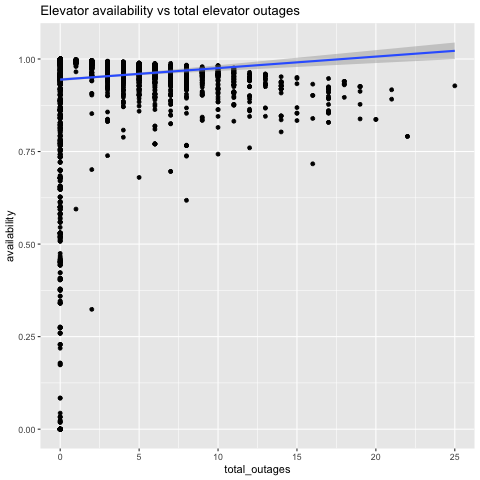

In [8]:
%%R

model = lm(availability ~ total_outages, data = df)
print(summary(model))

ggplot(df) +
    aes(x = total_outages, y = availability) +
    geom_point() +
    stat_smooth(method="lm") +
    labs(title = "Elevator availability vs total elevator outages") 
